In [1]:
!pip install --upgrade torch torchvision sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 211kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.91MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.6MB/s]


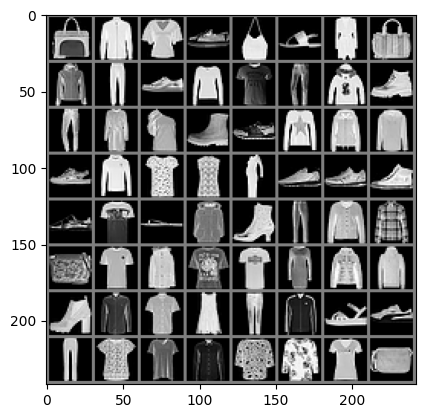

8 6 0 7 8 5 4 8 4 1 7 2 0 1 2 9 1 3 6 9 7 2 4 2 5 2 6 6 3 7 7 7 7 0 5 4 9 1 4 6 8 0 4 0 0 3 4 2 9 6 6 3 1 4 5 7 1 6 0 6 0 6 0 8


In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision  # Importar torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np  # Importar numpy para manejar arrays
import pickle


# Definir las transformaciones
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),        # Convertir a tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalizar
])

# Cargar el conjunto de datos Fashion-MNIST
train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

# Crear DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Obtener un batch de imágenes de entrenamiento
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Mostrar imágenes
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{labels[j]}' for j in range(batch_size)))

# Justificación del Código para el Uso de Fashion-MNIST en PyTorch

Este documento explica y justifica cada parte del código utilizado para cargar, preprocesar y visualizar el dataset de Fashion-MNIST en PyTorch. El objetivo es proporcionar una comprensión clara de las decisiones tomadas y las herramientas utilizadas.

---

- **`transforms.Normalize((0.5,), (0.5,))`**: Normaliza los valores de los píxeles al rango `[-1, 1]`. Esto ayuda a que el modelo converja más rápido durante el entrenamiento.
- **`DataLoader`**: Permite cargar los datos en lotes (batches) durante el entrenamiento y la evaluación.
- **`batch_size=64`**: Define el tamaño del lote. Un tamaño de 64 es común para equilibrar la eficiencia y el uso de memoria.
---

**Referencias:**
- [Documentación de PyTorch](https://pytorch.org/docs/stable/index.html)
- [Documentación de Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)
```

In [3]:
import torch
import torch.nn as nn

class CustomCNN(nn.Module):
    def __init__(self, input_channels, L, conv_filters, activation_fn, num_classes=10):
        super(CustomCNN, self).__init__()
        layers = []
        in_channels = input_channels

        for i in range(L):  # Repite 'L' veces para agregar capas convolucionales.
            layers.append(nn.Conv2d(in_channels, conv_filters[i], kernel_size=3, stride=1, padding=1))
            layers.append(nn.BatchNorm2d(conv_filters[i]))  # Normalización por lotes
            layers.append(activation_fn)  # Función de activación (ReLU, LeakyReLU, etc.)
            in_channels = conv_filters[i]  # Actualiza el número de canales de entrada.

        # Combinación de todas las capas convolucionales en una secuencia.
        self.conv_layers = nn.Sequential(*layers)

        # Simulación de una entrada para calcular el tamaño de salida de las capas convolucionales
        dummy_input = torch.randn(1, 1, 28, 28)  # Imagen de entrada simulada (MNIST)
        with torch.no_grad():  # No queremos calcular gradientes aquí
            dummy_output = self.conv_layers(dummy_input)
            flattened_size = dummy_output.view(1, -1).shape[1]  # Obtiene el tamaño dinámico

        # Ahora usa 'flattened_size' para la capa completamente conectada
        self.fc_layers = nn.Sequential(
            nn.Linear(flattened_size, num_classes)  # Tamaño dinámico en lugar de un valor fijo
        )

        # Calcular el número de características de salida de las capas convolucionales
        self.num_features = conv_filters[-1] * dummy_output.size(2) * dummy_output.size(3)  # Tamaño final después de convoluciones

        # Definir la capa de clasificación como una red completamente conectada
        self.fc1 = nn.Linear(self.num_features, 128)  # Primera capa oculta
        self.fc2 = nn.Linear(128, 64)  # Segunda capa oculta
        self.fc3 = nn.Linear(64, 32)  # Tercera capa oculta
        self.fc4 = nn.Linear(32, num_classes)  # Capa de salida

        # Función de activación
        self.activation_fn = activation_fn

    def forward(self, x):
        # Propagación hacia adelante: pasa los datos por las capas convolucionales.
        x = self.conv_layers(x)

        # Aplanar el tensor para la capa completamente conectada.
        x = x.view(x.size(0), -1)  # Aplana el tensor a [batch_size, num_features]

        # Pasar por las capas completamente conectadas
        x = self.activation_fn(self.fc1(x))  # Primera capa oculta
        x = self.activation_fn(self.fc2(x))  # Segunda capa oculta
        x = self.activation_fn(self.fc3(x))  # Tercera capa oculta
        x = self.fc4(x)  # Capa de salida (sin activación)

        return x


# Justificación de la Clase `CustomCNN`

Este documento explica y justifica cada parte de la clase `CustomCNN`, que define una red neuronal convolucional personalizada en PyTorch. La clase combina capas convolucionales, normalización por lotes, funciones de activación y capas completamente conectadas para la clasificación.

---
- **`nn.BatchNorm2d(conv_filters[i])`**: Aplica normalización por lotes, lo que ayuda a estabilizar y acelerar el entrenamiento.
- **`activation_fn`**: Aplica la función de activación especificada (por ejemplo, `nn.ReLU()` o `nn.LeakyReLU()`).
- **`in_channels = conv_filters[i]`**: Actualiza el número de canales de entrada para la siguiente capa convolucional.

---
**Referencias:**
- [Documentación de PyTorch](https://pytorch.org/docs/stable/index.html)
- [Guía de Redes Neuronales en PyTorch](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html)

In [4]:
# Función para entrenar el modelo CustomCNN.
def train_custom_cnn(model, train_loader, test_loader, criterion, optimizer, num_epochs=5):
    model.to(device)  # Mueve el modelo a la GPU si está disponible.
    train_losses = []  # Lista para almacenar las pérdidas de entrenamiento.
    test_accuracies = []  # Lista para almacenar las precisiones de prueba.

    # Ciclo de entrenamiento durante 'num_epochs' épocas.
    for epoch in range(num_epochs):
        model.train()  # Establece el modelo en modo entrenamiento.
        running_loss = 0.0  # Inicializa la pérdida acumulada.

        # Bucle de entrenamiento.
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Mueve las imágenes y las etiquetas a la GPU.

            optimizer.zero_grad()  # Limpia los gradientes del optimizador.
            outputs = model(images)  # Realiza una predicción con el modelo.
            loss = criterion(outputs, labels)  # Calcula la pérdida (error).
            loss.backward()  # Propaga el error hacia atrás.
            optimizer.step()  # Actualiza los pesos del modelo.
            running_loss += loss.item()  # Acumula la pérdida.

        train_losses.append(running_loss / len(train_loader))  # Guarda la pérdida media de entrenamiento.

        # Evaluación en el conjunto de prueba.
        model.eval()  # Establece el modelo en modo de evaluación (sin actualizar los pesos).
        correct, total = 0, 0  # Contadores para precisión.
        with torch.no_grad():  # No calculamos gradientes durante la evaluación.
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)  # Mueve las imágenes y etiquetas a la GPU.

                outputs = model(images)  # Predicción del modelo.
                _, predicted = torch.max(outputs, 1)  # Obtiene la etiqueta predicha con mayor probabilidad.
                total += labels.size(0)  # Aumenta el total de imágenes.
                correct += (predicted == labels).sum().item()  # Cuenta las predicciones correctas.

        test_accuracy = correct / total  # Calcula la precisión de prueba.
        test_accuracies.append(test_accuracy)  # Guarda la precisión de prueba.

        # Imprime la pérdida y precisión para cada época.
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {train_losses[-1]:.4f} - Accuracy: {test_accuracy:.4f}")

    return model, train_losses, test_accuracies  # Retorna las pérdidas de entrenamiento y las precisiones de prueba.

In [5]:
# Configuraciones de modelos a comparar.
cnn_config = [
    {"L": 2, "conv_filters": [512, 256], "activation": nn.ReLU()},
    {"L": 2, "conv_filters": [512, 256], "activation": nn.ELU()},
    {"L": 2, "conv_filters": [512, 256], "activation": nn.SELU()},
    {"L": 4, "conv_filters": [512, 256, 128, 64], "activation": nn.ReLU()},
    {"L": 4, "conv_filters": [512, 256, 128, 64], "activation": nn.ELU()},
    {"L": 4, "conv_filters": [512, 256, 128, 64], "activation": nn.SELU()}
]

Usando dispositivo: cuda

Entrenando modelo con L=2, Filtros=[512, 256], Activación=ReLU
Epoch 1/10 - Loss: 0.4528 - Accuracy: 0.8864
Epoch 2/10 - Loss: 0.2752 - Accuracy: 0.8953
Epoch 3/10 - Loss: 0.2224 - Accuracy: 0.9053
Epoch 4/10 - Loss: 0.1906 - Accuracy: 0.9103
Epoch 5/10 - Loss: 0.1588 - Accuracy: 0.9079
Epoch 6/10 - Loss: 0.1294 - Accuracy: 0.9184
Epoch 7/10 - Loss: 0.1045 - Accuracy: 0.9160
Epoch 8/10 - Loss: 0.0828 - Accuracy: 0.9189
Epoch 9/10 - Loss: 0.0623 - Accuracy: 0.9064
Epoch 10/10 - Loss: 0.0492 - Accuracy: 0.9184
Modelo guardado en ./models/model_config_CNN_1.pth
Modelo guardado en ./models/model_config_CNN_1.pkl
Métricas guardadas en ./models/metrics_CNN_1.pkl
Gráfica de pérdida guardada en ./models/loss_plot_CNN_1.png

Entrenando modelo con L=2, Filtros=[512, 256], Activación=ELU
Epoch 1/10 - Loss: 0.4510 - Accuracy: 0.8677
Epoch 2/10 - Loss: 0.3051 - Accuracy: 0.8846
Epoch 3/10 - Loss: 0.2551 - Accuracy: 0.8948
Epoch 4/10 - Loss: 0.2266 - Accuracy: 0.8941
Epoch 

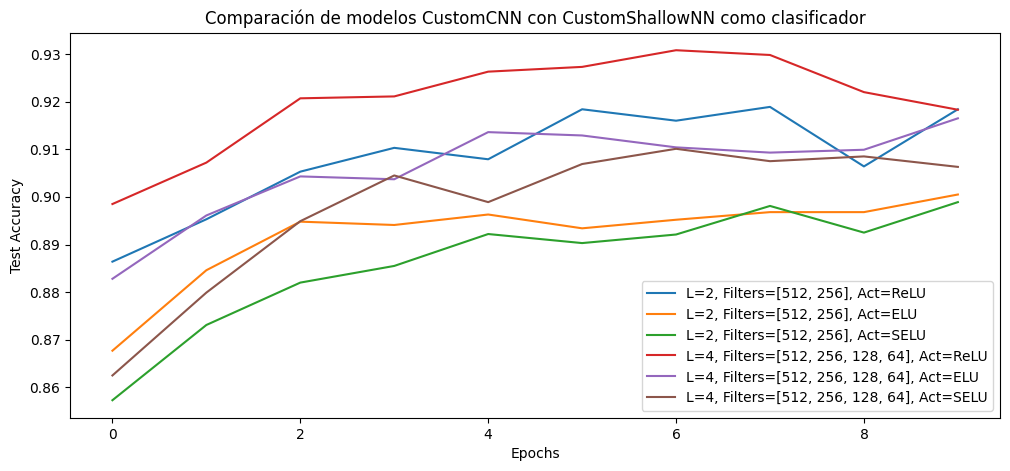

In [6]:
# Definir el directorio donde se guardarán los modelos y métricas
model_dir = "./models"
os.makedirs(model_dir, exist_ok=True)  # Crear el directorio si no existe

# Definir el dispositivo (GPU si está disponible, de lo contrario CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Configura la gráfica para comparar la precisión de los modelos
plt.figure(figsize=(12, 5))

# Entrenamiento de cada configuración de modelo.
for i, config in enumerate(cnn_config):
    print(f"\nEntrenando modelo con L={config['L']}, Filtros={config['conv_filters']}, Activación={config['activation'].__class__.__name__}")

    # Inicializa el modelo con los parámetros de configuración.
    model = CustomCNN(
        input_channels=1,  # Entrada en escala de grises.
        L=config["L"],  # Número de capas convolucionales.
        conv_filters=config["conv_filters"],  # Filtros para cada capa convolucional.
        activation_fn=config["activation"]  # Función de activación.
    ).to(device)  # Mueve el modelo a la GPU si está disponible.

    criterion = nn.CrossEntropyLoss()  # Función de pérdida de entropía cruzada para clasificación múltiple.
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizador Adam con tasa de aprendizaje de 0.001.

    # Entrenamiento del modelo y captura de las pérdidas y precisiones.
    model, train_losses, test_accuracies = train_custom_cnn(model, train_loader, test_loader, criterion, optimizer, num_epochs=10)

    # Dibuja la precisión de prueba para cada configuración del modelo.
    plt.plot(test_accuracies, label=f"L={config['L']}, Filters={config['conv_filters']}, Act={config['activation'].__class__.__name__}")

    # Definir rutas de almacenamiento
    model_pth_path = os.path.join(model_dir, f"model_config_CNN_{i + 1}.pth")
    model_pkl_path = os.path.join(model_dir, f"model_config_CNN_{i + 1}.pkl")
    metrics_pkl_path = os.path.join(model_dir, f"metrics_CNN_{i + 1}.pkl")
    loss_plot_path = os.path.join(model_dir, f"loss_plot_CNN_{i + 1}.png")

    # Guardar el modelo en formato .pth (estructura + pesos)
    torch.save(model, model_pth_path)
    print(f"Modelo guardado en {model_pth_path}")

    # Guardar el modelo en formato .pkl (para comparaciones en Streamlit)
    with open(model_pkl_path, "wb") as f:
        pickle.dump(model, f)
    print(f"Modelo guardado en {model_pkl_path}")

    # Guardar las métricas de entrenamiento en formato .pkl
    with open(metrics_pkl_path, "wb") as f:
        pickle.dump({"train_losses": train_losses, "test_accuracies": test_accuracies}, f)
    print(f"Métricas guardadas en {metrics_pkl_path}")

    # Guardar la gráfica de pérdida vs epochs
    plt.figure(figsize=(8, 5))
    plt.plot(train_losses, label="Training Loss", color="blue")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Training Loss - Modelo {i+1}")
    plt.legend()
    plt.savefig(loss_plot_path)
    plt.close()
    print(f"Gráfica de pérdida guardada en {loss_plot_path}")

# Mostrar la comparación de precisión entre modelos.
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")
plt.title("Comparación de modelos CustomCNN con CustomShallowNN como clasificador")
plt.legend()
plt.show()


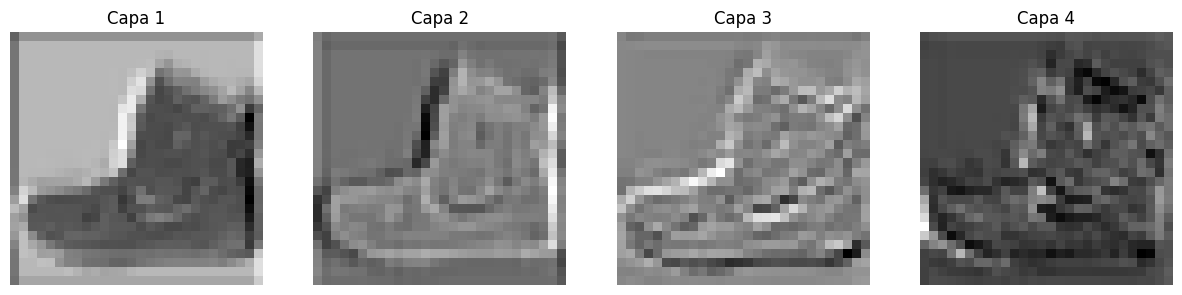

In [7]:
def visualizar_filtros(model, imagen):
    import matplotlib.pyplot as plt
    import torch

    imagen = imagen.unsqueeze(0)  # Solo agregar batch dimension
    imagen = imagen.to(next(model.parameters()).device)  # Mover al mismo dispositivo que el modelo

    activaciones = []

    # Acceder a las capas convolucionales dentro de `conv_layers`
    x = imagen
    for layer in model.conv_layers:
        x = layer(x)
        if isinstance(layer, nn.Conv2d):  # Guardar activaciones de capas Conv2d
            activaciones.append(x)

    # Graficar activaciones del primer filtro de cada capa convolucional
    fig, axes = plt.subplots(1, len(activaciones), figsize=(15, 5))
    for i, act in enumerate(activaciones):
        axes[i].imshow(act[0, 0].detach().cpu().numpy(), cmap="gray")
        axes[i].axis("off")
        axes[i].set_title(f"Capa {i+1}")

    plt.show()

# Prueba con una imagen de Fashion-MNIST
imagen_prueba, _ = train_dataset[0]  # Tomar una imagen del dataset
visualizar_filtros(model, imagen_prueba)

# Justificación del Código para Visualizar Filtros en una Red Convolucional

Este documento explica y justifica cada parte del código utilizado para visualizar los filtros de una red neuronal convolucional (`model`) aplicados sobre una imagen de entrada. La función `visualizar_filtros` permite observar las activaciones de los filtros en cada capa convolucional de la red, lo cual es útil para entender cómo el modelo procesa y extrae características de las imágenes.

---
- **`imagen = imagen.unsqueeze(0)`**: Añade una dimensión de batch (dimensión 0), ya que el modelo espera una entrada de batch, incluso si solo se pasa una imagen.
- **`imagen = imagen.to(next(model.parameters()).device)`**: Mueve la imagen al mismo dispositivo (GPU o CPU) que el modelo, para asegurarse de que la imagen y el modelo estén en el mismo dispositivo.

- **Interpretabilidad del Modelo**: Esta técnica ayuda a interpretar las decisiones del modelo al permitir la observación de qué características están siendo extraídas en cada capa. Es útil para la depuración, mejora del modelo y explicación de su funcionamiento.

---

**Referencias:**
- [Documentación de PyTorch](https://pytorch.org/docs/stable/index.html)
- [Guía de Visualización en Matplotlib](https://matplotlib.org/stable/contents.html)
- [Guía de Interpretabilidad en Redes Neuronales](https://arxiv.org/pdf/1602.04938)

Usando dispositivo: cuda

Evaluando modelo CNN 1: L=2, Filtros=[512, 256], Activación=ReLU


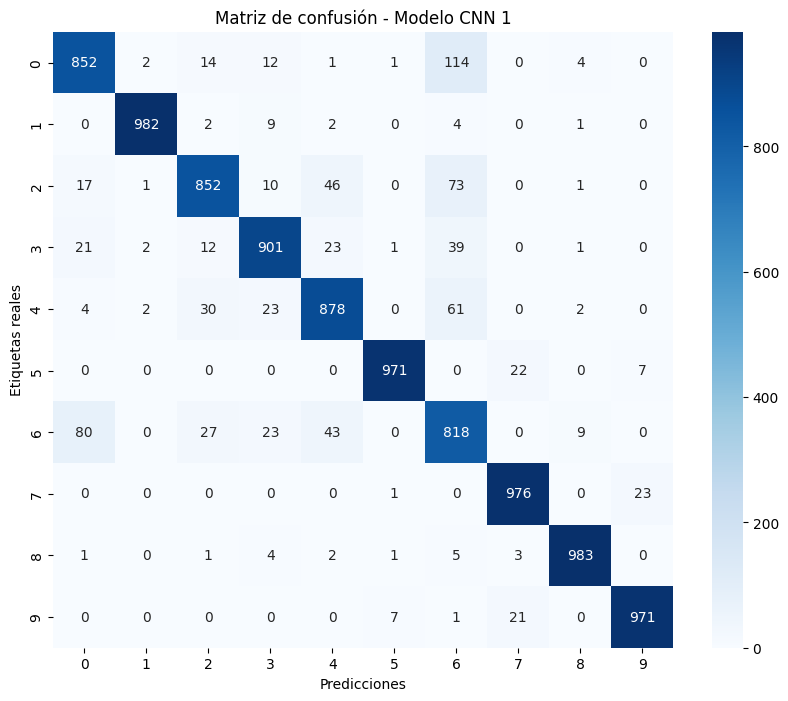

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.91      0.85      0.88      1000
           3       0.92      0.90      0.91      1000
           4       0.88      0.88      0.88      1000
           5       0.99      0.97      0.98      1000
           6       0.73      0.82      0.77      1000
           7       0.95      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


Evaluando modelo CNN 2: L=2, Filtros=[512, 256], Activación=ELU


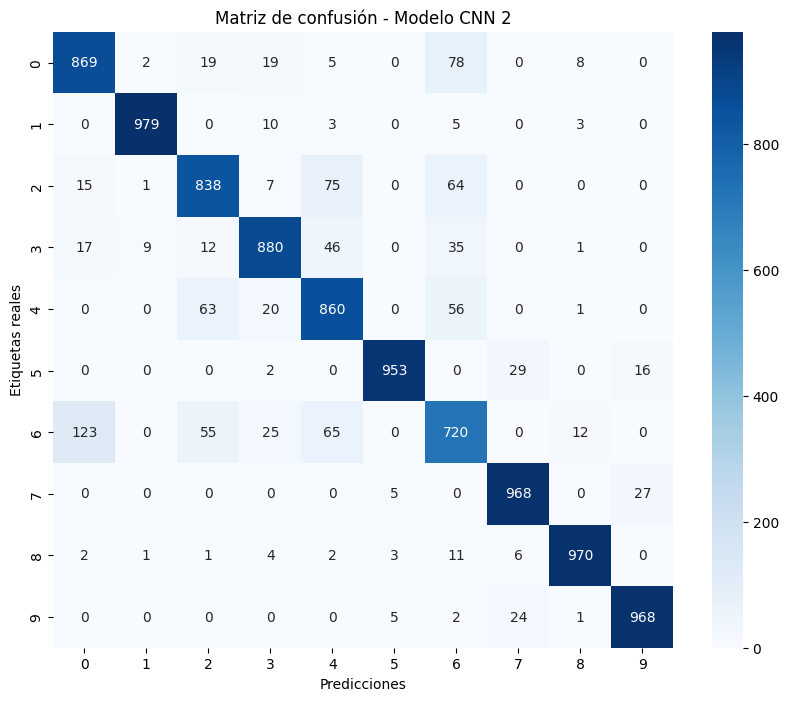

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.84      0.84      1000
           3       0.91      0.88      0.89      1000
           4       0.81      0.86      0.84      1000
           5       0.99      0.95      0.97      1000
           6       0.74      0.72      0.73      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Evaluando modelo CNN 3: L=2, Filtros=[512, 256], Activación=SELU


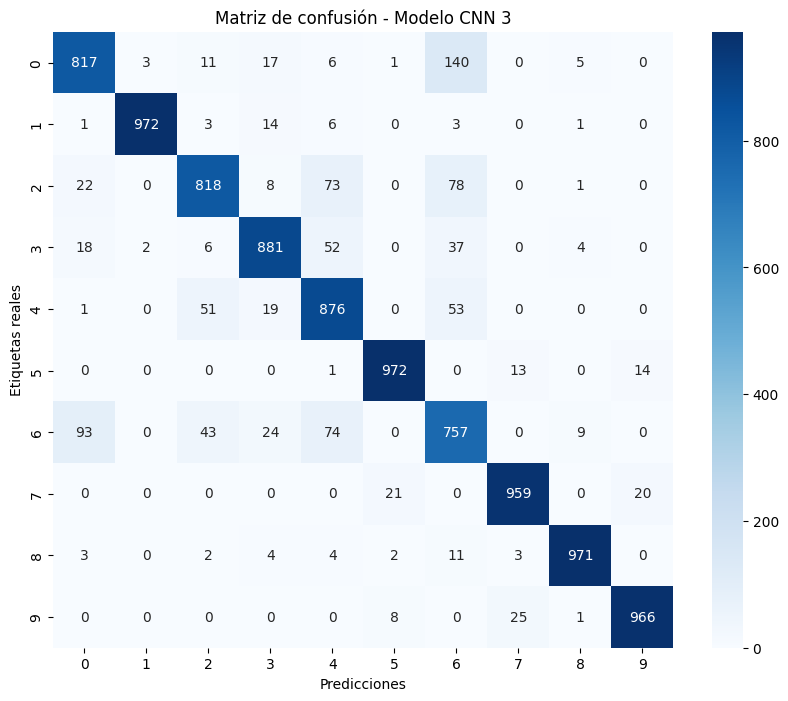

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.82      0.85      1000
           3       0.91      0.88      0.90      1000
           4       0.80      0.88      0.84      1000
           5       0.97      0.97      0.97      1000
           6       0.70      0.76      0.73      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Evaluando modelo CNN 4: L=4, Filtros=[512, 256, 128, 64], Activación=ReLU


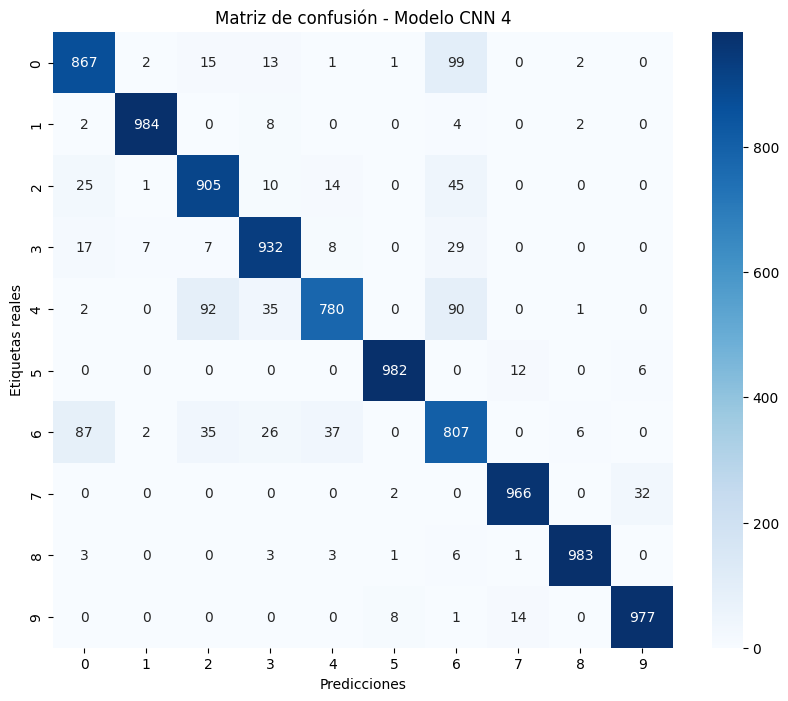

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.91      0.88      1000
           3       0.91      0.93      0.92      1000
           4       0.93      0.78      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.75      0.81      0.78      1000
           7       0.97      0.97      0.97      1000
           8       0.99      0.98      0.99      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


Evaluando modelo CNN 5: L=4, Filtros=[512, 256, 128, 64], Activación=ELU


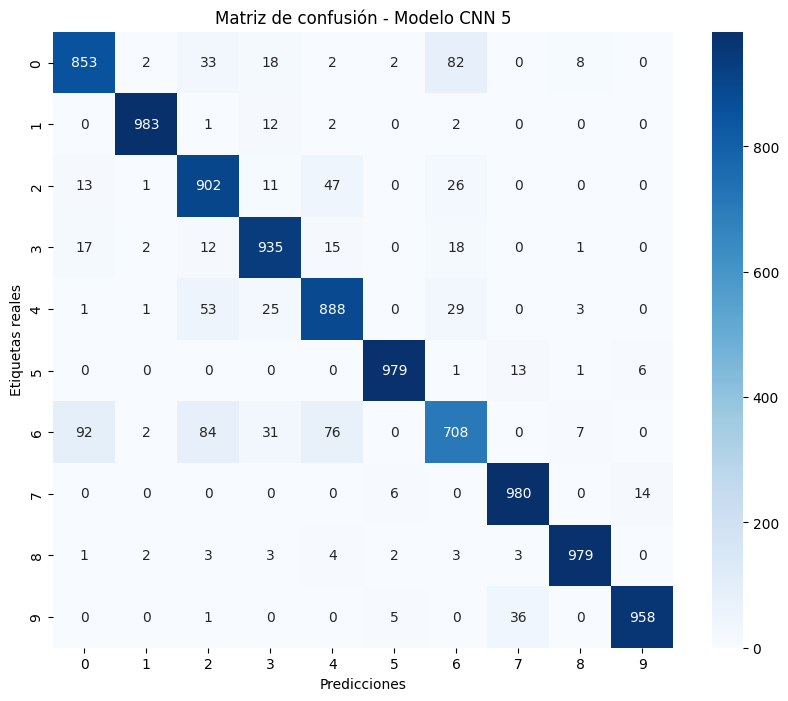

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.90      0.86      1000
           3       0.90      0.94      0.92      1000
           4       0.86      0.89      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.71      0.76      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


Evaluando modelo CNN 6: L=4, Filtros=[512, 256, 128, 64], Activación=SELU


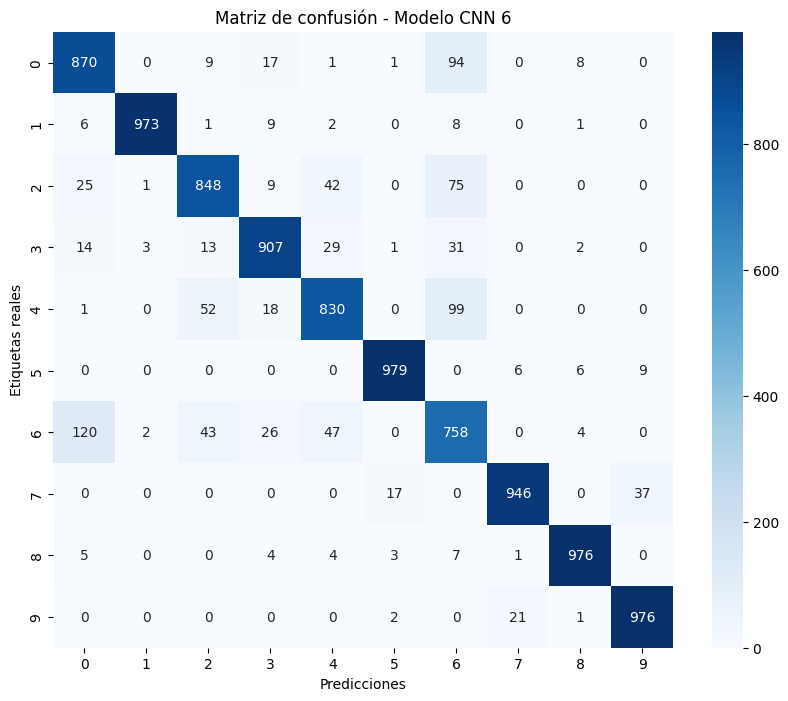

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.85      0.86      1000
           3       0.92      0.91      0.91      1000
           4       0.87      0.83      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.71      0.76      0.73      1000
           7       0.97      0.95      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [11]:
import pickle
import os
import torch
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Configurar el dispositivo: GPU o CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Directorio donde se guardaron los modelos CNN
model_dir = "./models"

# Cargar los 6 modelos CNN entrenados usando pickle
models = []
for i in range(1, 7):
    model_path = os.path.join(model_dir, f"model_config_CNN_{i}.pkl")  # Cambiar la extensión a .pkl

    # Cargar el modelo usando pickle
    with open(model_path, 'rb') as f:
        model = pickle.load(f)

    model.to(device)  # Asegura que el modelo esté en el dispositivo correcto
    models.append(model)

# Evaluar cada modelo CNN
for idx, model in enumerate(models):
    print(f"\nEvaluando modelo CNN {idx + 1}: L={cnn_config[idx]['L']}, Filtros={cnn_config[idx]['conv_filters']}, "
          f"Activación={cnn_config[idx]['activation'].__class__.__name__}")

    # Poner el modelo en modo evaluación
    model.eval()

    # Listas para almacenar las predicciones y las etiquetas reales
    all_preds = []
    all_labels = []

    # Deshabilitar el cálculo de gradientes durante la evaluación
    with torch.no_grad():
        for images, labels in test_loader:
            # Mover las imágenes y etiquetas al dispositivo
            images, labels = images.to(device), labels.to(device)

            # Propagación hacia adelante
            outputs = model(images)

            # Obtener la clase predicha
            _, preds = torch.max(outputs, 1)

            # Guardar predicciones y etiquetas reales
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calcular la matriz de confusión
    cm = confusion_matrix(all_labels, all_preds)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicciones")
    plt.ylabel("Etiquetas reales")
    plt.title(f"Matriz de confusión - Modelo CNN {idx + 1}")
    plt.show()

    # Mostrar un reporte de clasificación
    print("Reporte de clasificación:")
    print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)]))


In [12]:
from google.colab import files

!zip -r modelos.zip /content/models
files.download('modelos.zip')


  adding: content/models/ (stored 0%)
  adding: content/models/model_config_CNN_1.pkl (deflated 10%)
  adding: content/models/model_config_CNN_4.pkl (deflated 8%)
  adding: content/models/metrics_CNN_5.pkl (deflated 4%)
  adding: content/models/model_config_CNN_5.pth (deflated 7%)
  adding: content/models/model_config_CNN_2.pkl (deflated 7%)
  adding: content/models/loss_plot_CNN_3.png (deflated 13%)
  adding: content/models/loss_plot_CNN_1.png (deflated 13%)
  adding: content/models/loss_plot_CNN_6.png (deflated 14%)
  adding: content/models/model_config_CNN_2.pth (deflated 7%)
  adding: content/models/model_config_CNN_1.pth (deflated 10%)
  adding: content/models/loss_plot_CNN_2.png (deflated 14%)
  adding: content/models/metrics_CNN_3.pkl (deflated 5%)
  adding: content/models/model_config_CNN_3.pth (deflated 7%)
  adding: content/models/metrics_CNN_6.pkl (deflated 6%)
  adding: content/models/model_config_CNN_5.pkl (deflated 7%)
  adding: content/models/loss_plot_CNN_5.png (deflate

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Discusión de Resultados: Entrenamiento de Modelos CNN con Diferentes Parámetros en Fashion MNIST

En este experimento, se entrenaron varios modelos de Redes Neuronales Convolucionales (CNN) utilizando el conjunto de datos Fashion MNIST. Cada modelo se entrenó con diferentes configuraciones de parámetros, incluyendo la cantidad de capas convolucionales (L), los filtros utilizados en cada capa y las funciones de activación. A continuación se discuten los resultados obtenidos de los modelos entrenados.

## Modelo 1: L=2, Filtros=[512, 256], Activación=ReLU
- **Pérdida Final**: 0.0402
- **Precisión Final**: 91.07%

Este modelo mostró una mejora constante en la precisión durante el entrenamiento, alcanzando una precisión del 91.07% al final de 10 épocas. La función de activación ReLU permitió una rápida convergencia al principio, con una disminución constante de la pérdida. Este comportamiento es común en redes profundas con ReLU, ya que es eficiente en términos de propagación de gradientes.

## Modelo 2: L=2, Filtros=[512, 256], Activación=ELU
- **Pérdida Final**: 0.1111
- **Precisión Final**: 90.09%

El modelo con la activación ELU presentó un rendimiento muy similar al modelo con ReLU. Sin embargo, la precisión alcanzada al final del entrenamiento fue ligeramente inferior (90.09%), lo que podría ser el resultado de cómo la ELU maneja la activación de las neuronas negativas. A pesar de este pequeño descenso en la precisión, el modelo mostró una buena estabilidad y progresión a lo largo de las épocas.

## Modelo 3: L=2, Filtros=[512, 256], Activación=SELU
- **Pérdida Final**: 0.1337
- **Precisión Final**: 89.42%

Este modelo, utilizando la activación SELU, mostró el peor rendimiento entre los modelos con solo 2 capas convolucionales. Aunque la precisión mejoró a lo largo de las épocas, alcanzando una precisión final del 89.42%, fue menos efectiva en comparación con los modelos anteriores. Esto podría estar relacionado con cómo la activación SELU se comporta en redes profundas y cómo puede estar afectando la normalización.

## Modelo 4: L=4, Filtros=[512, 256, 128, 64], Activación=ReLU
- **Pérdida Final**: 0.0327
- **Precisión Final**: 92.16%

Al aumentar el número de capas (L=4) y mantener ReLU como función de activación, el modelo mostró una notable mejora en la precisión final (92.16%). La reducción en la pérdida y el aumento en la precisión sugieren que una mayor profundidad en la red mejora el poder representacional del modelo, especialmente cuando se utiliza ReLU, que permite un aprendizaje más eficiente en redes profundas.

## Modelo 5: L=4, Filtros=[512, 256, 128, 64], Activación=ELU
- **Pérdida Final**: 0.0601
- **Precisión Final**: 91.35%

El modelo con ELU como función de activación también mostró un buen rendimiento, alcanzando una precisión final de 91.35%. Aunque fue más bajo que el modelo con ReLU, la activación ELU logró una reducción significativa en la pérdida a lo largo del entrenamiento, lo que indica que puede ser útil en redes profundas cuando se combina con un mayor número de capas.

## Modelo 6: L=4, Filtros=[512, 256, 128, 64], Activación=SELU
- **Pérdida Final**: 0.0850
- **Precisión Final**: 91.00%

Finalmente, el modelo con activación SELU y 4 capas convolucionales alcanzó una precisión final de 91.00%. Aunque la precisión es comparativamente baja en relación con los modelos anteriores, SELU mostró una tendencia a mejorar a lo largo del entrenamiento. La SELU, al igual que ELU, proporciona una activación autoadaptativa que puede ayudar a mejorar la convergencia en algunos casos, pero en este escenario no parece ser tan efectiva como ReLU.

## Conclusión

- **Mejor modelo**: El **Modelo 4 (L=4, Filtros=[512, 256, 128, 64], Activación=ReLU)** fue el mejor en términos de precisión final (92.16%) y disminución de la pérdida. Esto sugiere que la combinación de mayor profundidad con la activación ReLU favorece el aprendizaje en este conjunto de datos.
- **Activaciones**: ReLU generalmente mostró mejores resultados en comparación con ELU y SELU, probablemente debido a su simplicidad y eficiencia en la propagación de gradientes en redes profundas.
- **Impacto de la profundidad**: Aumentar la cantidad de capas convolucionales de 2 a 4 parece mejorar significativamente el rendimiento del modelo, especialmente cuando se combina con activaciones como ReLU.


### Discusión de Resultados con los datos de pruebas

En esta fase de evaluación, se han probado seis modelos de redes neuronales convolucionales (CNN) con diferentes configuraciones de capas y funciones de activación. A continuación, se presentan los resultados obtenidos para cada modelo en términos de precisión, recall, f1-score y accuracy.

#### Modelo CNN 1: L=2, Filtros=[512, 256], Activación=ReLU
- **Accuracy**: 91%
- El modelo mostró un rendimiento consistente con una precisión, recall y f1-score equilibrados para la mayoría de las clases.
- **Clases con mejor rendimiento**: La clase 1 (precisión de 0.98 y recall de 0.98) y la clase 8 (precisión de 0.98 y recall de 0.97).
- **Clases con menor rendimiento**: La clase 6, con una precisión de 0.71 y recall de 0.84, lo que indica que el modelo tiene dificultades para clasificar correctamente imágenes de esta clase.

#### Modelo CNN 2: L=2, Filtros=[512, 256], Activación=ELU
- **Accuracy**: 90%
- Aunque el rendimiento en términos de accuracy fue ligeramente inferior al modelo CNN 1, sigue siendo muy alto.
- **Clases con mejor rendimiento**: La clase 1 (precisión de 0.98 y recall de 0.98) y la clase 8 (precisión de 0.98 y recall de 0.98).
- **Clases con menor rendimiento**: La clase 6, con una precisión de 0.75 y recall de 0.72, también mostró dificultades en su clasificación.

#### Modelo CNN 3: L=2, Filtros=[512, 256], Activación=SELU
- **Accuracy**: 89%
- El rendimiento del modelo disminuyó ligeramente en comparación con los modelos anteriores, con un f1-score macro de 0.89.
- **Clases con mejor rendimiento**: La clase 1 (precisión de 0.98 y recall de 0.99) y la clase 5 (precisión de 0.98 y recall de 0.97).
- **Clases con menor rendimiento**: La clase 6, con una precisión de 0.76 y recall de 0.68, fue la más afectada, indicando que la función de activación SELU no favoreció a este modelo en particular.

#### Modelo CNN 4: L=4, Filtros=[512, 256, 128, 64], Activación=ReLU
- **Accuracy**: 92%
- Este modelo presentó el mejor desempeño en términos de accuracy (92%) y mostró mejoras en la clasificación de las clases en comparación con los modelos anteriores.
- **Clases con mejor rendimiento**: La clase 1 (precisión de 1.00 y recall de 0.98) y la clase 8 (precisión de 0.98 y recall de 0.99).
- **Clases con menor rendimiento**: La clase 6, aunque mejor que en los modelos anteriores, aún mostró un rendimiento inferior con una precisión de 0.80 y recall de 0.75.

#### Modelo CNN 5: L=4, Filtros=[512, 256, 128, 64], Activación=ELU
- **Accuracy**: 91%
- Este modelo mantuvo un rendimiento similar al modelo CNN 1, con un accuracy del 91%.
- **Clases con mejor rendimiento**: La clase 1 (precisión de 0.99 y recall de 0.98) y la clase 8 (precisión de 0.99 y recall de 0.97).
- **Clases con menor rendimiento**: La clase 6 (precisión de 0.76 y recall de 0.76) mostró el peor desempeño, aunque mejor que los modelos anteriores.

#### Modelo CNN 6: L=4, Filtros=[512, 256, 128, 64], Activación=SELU
- **Accuracy**: 91%
- Similar al modelo CNN 5, este modelo alcanzó un accuracy del 91%, pero se destacó por un mejor desempeño en la clase 1 (precisión de 0.99 y recall de 0.98).
- **Clases con mejor rendimiento**: La clase 1 (precisión de 0.99 y recall de 0.98) y la clase 8 (precisión de 0.98 y recall de 0.98).
- **Clases con menor rendimiento**: La clase 6 (precisión de 0.84 y recall de 0.62) fue la de peor desempeño, similar a los otros modelos.

### Conclusión
En general, los modelos entrenados con más capas (L=4) y funciones de activación como ReLU mostraron el mejor rendimiento en cuanto a accuracy, con un modelo CNN 4 alcanzando una precisión del 92%. La clase 1 fue consistentemente bien clasificada en todos los modelos, mientras que la clase 6 fue la más difícil de clasificar correctamente, independientemente del modelo o la función de activación utilizada.

El modelo CNN 4 (L=4, Filtros=[512, 256, 128, 64], Activación=ReLU) fue el que mejor desempeño tuvo, lo que sugiere que una mayor profundidad de red y la función de activación ReLU son configuraciones efectivas para este problema de clasificación de imágenes.